# Создание признаков

*Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения.*

Он включает в себя несколько этапов: 

1. создание признаков;
2. преобразование признаков;
3. отбор признаков.

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.

Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. *Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал*

***Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации.***

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

1. с помощью внешних источников данных;
2. из существующего набора данных.


***Пример 1***
*В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку.*

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

***Пример 2***

*Для определения дефолтности клиента банки делают запрос в БКИ с целью получения дополнительной информации по клиенту.*
*Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.*

Работе с внешними источниками данных будет посвящен следующий юнит.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1. разбор категорий; 
2. разбор даты и времени;
3. разбор числовых признаков;
4. разбор текста.

*Рассмотрим эти способы на примере задачи винных обзоров. Вспомним задачу винного сомелье — научиться определять рейтинг (качество) вина по его различным характеристикам. В этом модуле для практических заданий мы будем пользоваться подготовленным и очищенным датасетом.*

## Разбор даты и времени

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

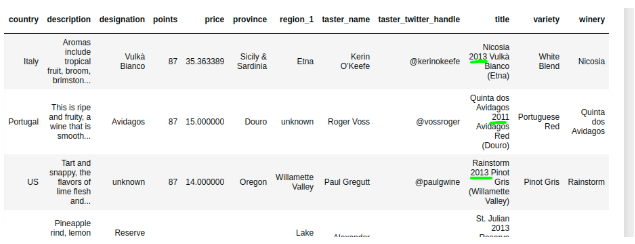

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

Подробнее про создание признаков из даты и времени вы узнаете в одном из следующих юнитов.

## Разбор числовых величин

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [26]:
import pandas as pd
import statistics
wine_data = pd.read_csv('data/wine_cleared.csv', sep=',', index_col=0)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.9+ MB


In [27]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 13.9+ MB


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

***Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации.***

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

## Разбор текста

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться ***регулярными выражениями.***

***Регулярные выражения (regexp, или regex)*** — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

***Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.***

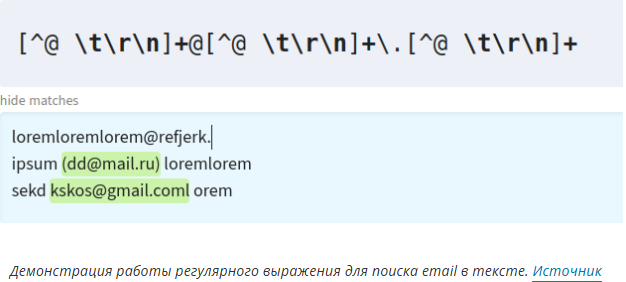

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок.](https://tproger.ru/translations/regular-expression-python/)

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом [str.findall()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html). Метод возвращает все совпадения с заданным шаблоном в серии pandas.

 Выполните код для нахождения года вина при помощи регулярного выражения:

In [28]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)
display(wine_data['year'])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_5604\2643599466.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

Разберём регулярное выражение \d{4}:

- \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
- {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

*Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.*

Шпаргалка https://ihateregex.io/cheatsheet

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

Полученный признак year будет выглядеть следующим образом:

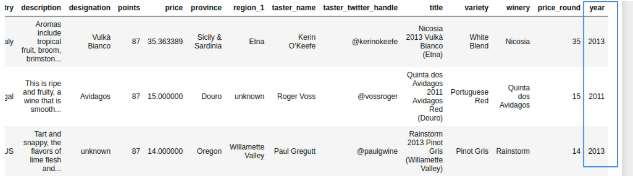

Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

## Разбор категорий

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [16]:
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)

В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

### Задание 2.1

Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [29]:
wine_data['country'].value_counts().head(3)

country
US        54504
France    22093
Italy     19540
Name: count, dtype: int64

In [30]:
wine_data.groupby(['country'])['country'].count().sort_values(axis = 0, ascending=False).head(3)

country
US        54504
France    22093
Italy     19540
Name: country, dtype: int64

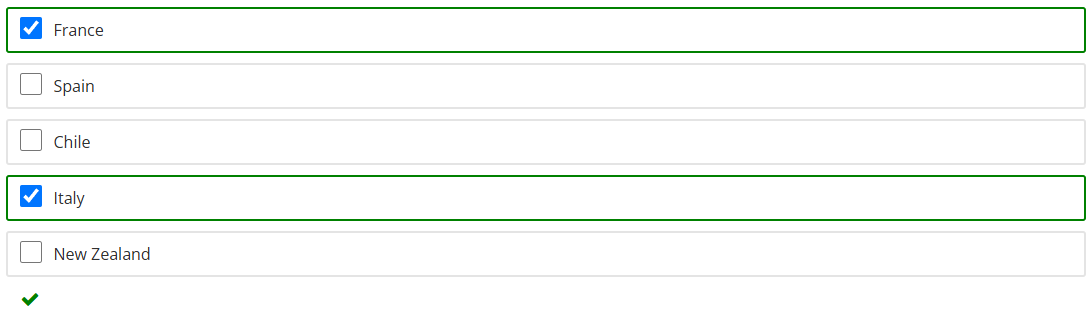

### Задание 2.2

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

В ответ впишите результат выполнения кода data['is_france'].sum():

In [31]:
wine_data['is_france'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_france'].sum()

np.int64(22093)

В ответ впишите результат выполнения кода data['is_italy'].sum():

In [32]:
wine_data['is_italy'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
wine_data['is_italy'].sum()

np.int64(19540)

***Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.***

*Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам.*

*Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года.*

## Задание 2.3

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

In [36]:
wine_data['year'] = wine_data['year'].astype(float)
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int64  
 13  year                   125362 non-null  float64
 14  is_france              129971 non-null  i

In [37]:
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if x < 2010 else 0)

wine_data['old_wine'].sum()

np.int64(39781)

***Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.***

Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

Выполните следующие задания для закрепления изученного материала. ⬇️

### Задание 2.4

Создание признаков — это…

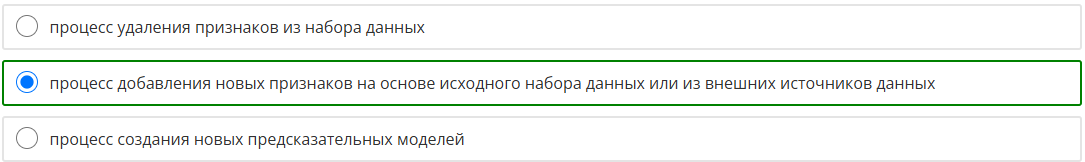

### Задание 2.5

Проектирование признаков включает в себя… Выберите все верные варианты.

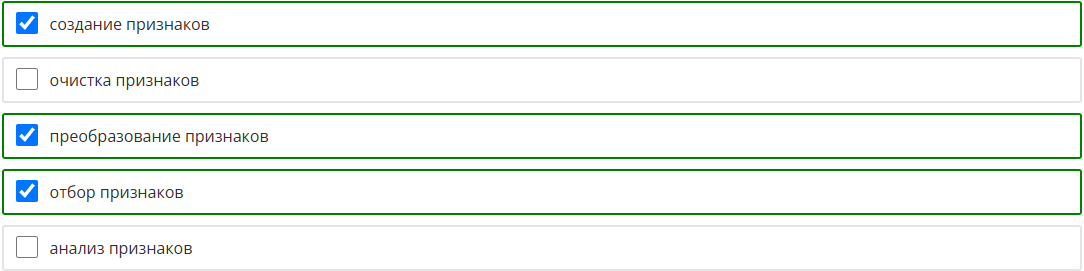

### Задание 2.6

Сопоставьте этапы создания признаков и используемые приёмы.

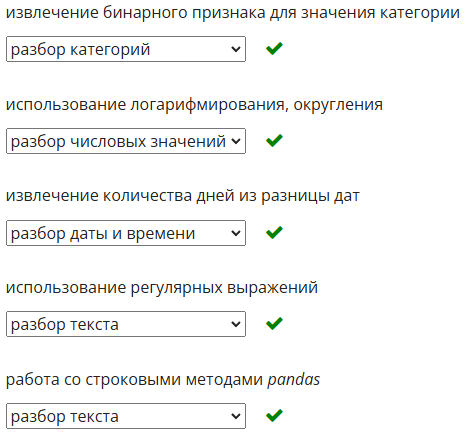

### Задание 2.7 (Самопроверка)

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [38]:
regex = '\((.*?)\)'
wine_data['locality'] = wine_data['title'].str.findall(regex).str.get(0)
display(wine_data['locality'])

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_5604\497980314.py:1: SyntaxWarning: invalid escape sequence '\('
  regex = '\((.*?)\)'


0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

In [39]:
wine_data.to_csv('data/wine_sings.csv')